## import library and load data

In [333]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
#file_path = "C:/Users/User/OneDrive/桌面/統諮期末/Sleep_health_and_lifestyle_dataset.csv"
#data = pd.read_csv(file_path)

In [334]:
#visualization
import seaborn as sns
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
#Data spliting
from sklearn.model_selection import train_test_split

In [335]:
from google.colab import drive
#我的雲端硬碟
drive.mount('/content/drive')
#讀取資料
data=pd.read_csv("/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA

In [336]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [338]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [339]:
data.shape

(374, 13)

In [340]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [341]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [342]:
columns = [column for column in data.columns if column!='Person ID']
for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95

In [343]:
data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [344]:
# 刪除 Person ID
data = data.drop(columns=["Person ID"])

# 把 blood pressure 分成兩個正常(0)與不正常(1)
data["Blood Pressure"] = data["Blood Pressure"].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
# 0 = normal blood pressure
# 1 = abnormal blood pressure

# 分類 Physical Activity Level
data["Physical Activity Level"] = pd.cut(
    data["Physical Activity Level"],
    bins=[-float("inf"), 35, 45, 60, 75, 90],
    labels=["<=35", "<=45", "<=60", "<=75", "<=90"]
)

# 分類 Daily Steps
data["Daily Steps"] = pd.cut(
    data["Daily Steps"],
    bins=[-float("inf"), 5000, 6000, 7000, float("inf")],
    labels=["<=5000", "<=6000", "<=7000", "7000up"]
)

# 將睡眠疾病轉換為 0 和 1
data["Sleep Disorder"] = data["Sleep Disorder"].apply(lambda x: 0 if pd.isna(x) else 1)

# 分類 BMI
data["BMI Category"] = data["BMI Category"].replace({
    "Normal Weight": "Normal",
    "Obese": "Overweight"
})

# 分類 Quality of Sleep
data["Quality of Sleep"] = data["Quality of Sleep"].apply(lambda x: "4-5" if x in [4, 5] else x)

# 分類 Occupation
data["Occupation"] = data["Occupation"].replace({
    "Manager": "Salesperson",
    "Sales Representative": "Salesperson",
    "Software Engineer": "Engineer"
})

In [345]:
data['Sleep Disorder'] = data['Sleep Disorder'].astype("category")

In [346]:
#for colored text output ( Text ,Text colors ,Text highlights , Attributes)
number_of_values=colored(data.nunique(), "magenta",None, attrs=["blink"])

print(number_of_values) #for number of values of columns

Gender                      2
Age                        31
Occupation                  8
Sleep Duration             27
Quality of Sleep            5
Physical Activity Level     5
Stress Level                6
BMI Category                2
Blood Pressure              2
Heart Rate                 19
Daily Steps                 4
Sleep Disorder              2
dtype: int64


In [347]:
data.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Engineer,6.1,6,<=45,6,Overweight,0,77,<=5000,0
1,Male,28,Doctor,6.2,6,<=60,8,Normal,0,75,7000up,0
2,Male,28,Doctor,6.2,6,<=60,8,Normal,0,75,7000up,0
3,Male,28,Salesperson,5.9,4-5,<=35,8,Overweight,1,85,<=5000,1
4,Male,28,Salesperson,5.9,4-5,<=35,8,Overweight,1,85,<=5000,1
5,Male,28,Engineer,5.9,4-5,<=35,8,Overweight,1,85,<=5000,1
6,Male,29,Teacher,6.3,6,<=45,7,Overweight,1,82,<=5000,1
7,Male,29,Doctor,7.8,7,<=75,6,Normal,0,70,7000up,0
8,Male,29,Doctor,7.8,7,<=75,6,Normal,0,70,7000up,0
9,Male,29,Doctor,7.8,7,<=75,6,Normal,0,70,7000up,0


In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   374 non-null    object  
 1   Age                      374 non-null    int64   
 2   Occupation               374 non-null    object  
 3   Sleep Duration           374 non-null    float64 
 4   Quality of Sleep         374 non-null    object  
 5   Physical Activity Level  374 non-null    category
 6   Stress Level             374 non-null    int64   
 7   BMI Category             374 non-null    object  
 8   Blood Pressure           374 non-null    int64   
 9   Heart Rate               374 non-null    int64   
 10  Daily Steps              374 non-null    category
 11  Sleep Disorder           374 non-null    category
dtypes: category(3), float64(1), int64(4), object(4)
memory usage: 28.0+ KB


In [349]:
data['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
0,219
1,155


In [350]:
fig=px.treemap(data,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'],
               color='Sleep Disorder',
              color_discrete_sequence=['#EBDEF0','#C39BD3','#4A235A'])

fig.update_layout(title='<b>The effect of job on sleep</b>..',
                 title_font={'size':20})

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [351]:
categorical_columns = ['Sleep Disorder', 'Quality of Sleep']  # Update with your column names
data[categorical_columns] = data[categorical_columns].astype(str)

fig=px.sunburst(data,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration',)

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>..',
                 title_font={'size':25})

fig.show()

In [352]:
fig=px.sunburst(data,path=[px.Constant('Daily Steps'),'Sleep Disorder','Daily Steps'],
               color='Sleep Disorder',values='Sleep Duration')

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>..',
                 title_font={'size':25})

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



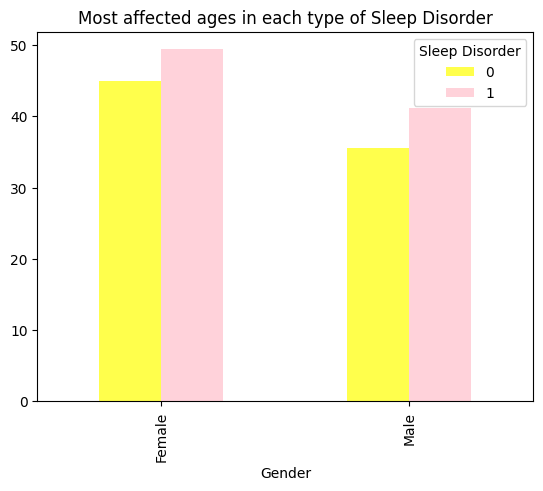

In [353]:
data.pivot_table(index='Gender',columns='Sleep Disorder',values='Age',aggfunc='mean').plot(kind='bar',color={'yellow','pink'},
                                                                                                   title='Most affected ages in each type of Sleep Disorder',
                                                                                                    label='Age',alpha=.7)
plt.show()

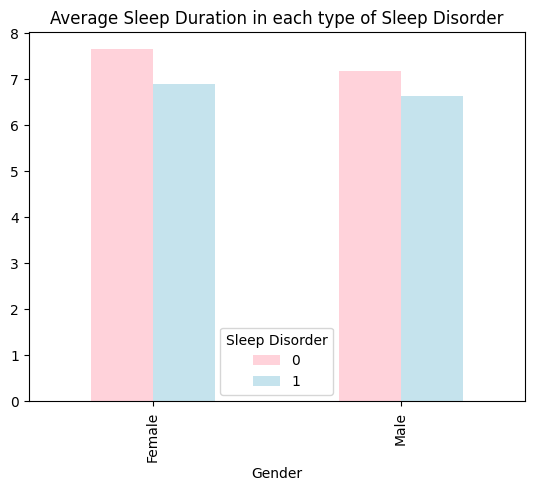

In [354]:
data.pivot_table(index='Gender',columns='Sleep Disorder',values='Sleep Duration',aggfunc='mean').plot(kind='bar',color={'lightblue','pink'},
                                                                                                   title='Average Sleep Duration in each type of Sleep Disorder',
                                                                                                    label='Age',alpha=.7)
plt.show()

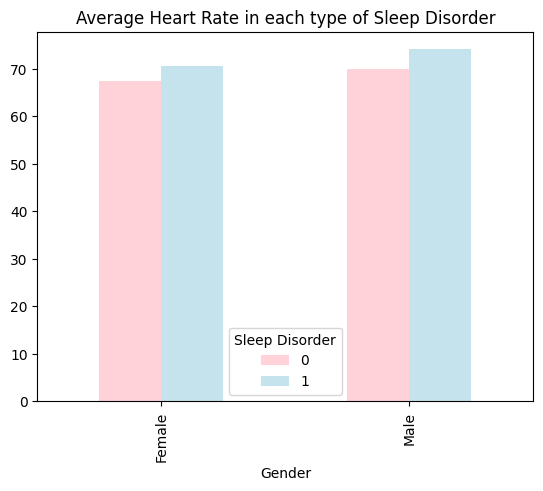

In [355]:
data.pivot_table(index='Gender',columns='Sleep Disorder',values='Heart Rate',aggfunc='mean').plot(kind='bar',color={'lightblue','pink'},
                                                                                                   title='Average Heart Rate in each type of Sleep Disorder',
                                                                                                    label='Age',alpha=.7)
plt.show()

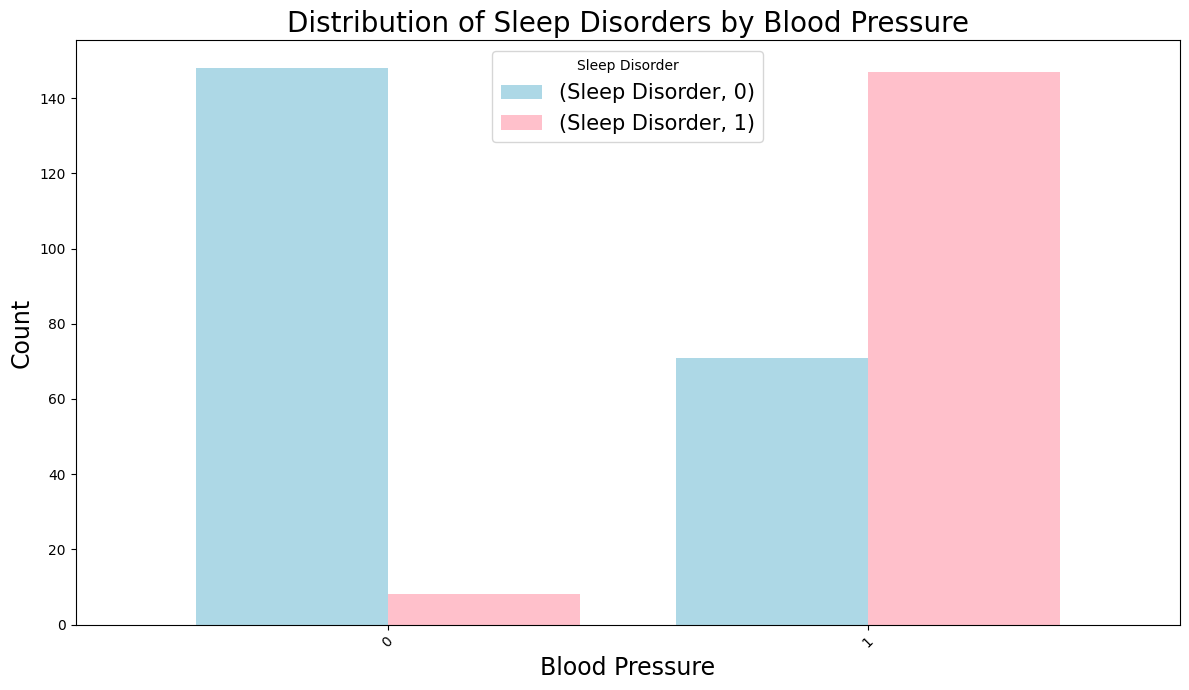

In [356]:
# Pivot table to aggregate the data
pivot_data = data.pivot_table(
    index='Blood Pressure',
    columns='Sleep Disorder',
    aggfunc={'Sleep Disorder': 'count'}
)
# Plot a bar chart
pivot_data.plot.bar(
    figsize=(12, 7),
    color=['lightblue','pink'],
    width=0.8
)
# Add labels and title
plt.title('Distribution of Sleep Disorders by Blood Pressure', fontsize=20)
plt.ylabel('Count', fontsize=17)
plt.xlabel('Blood Pressure', fontsize=17)
plt.legend(title='Sleep Disorder', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

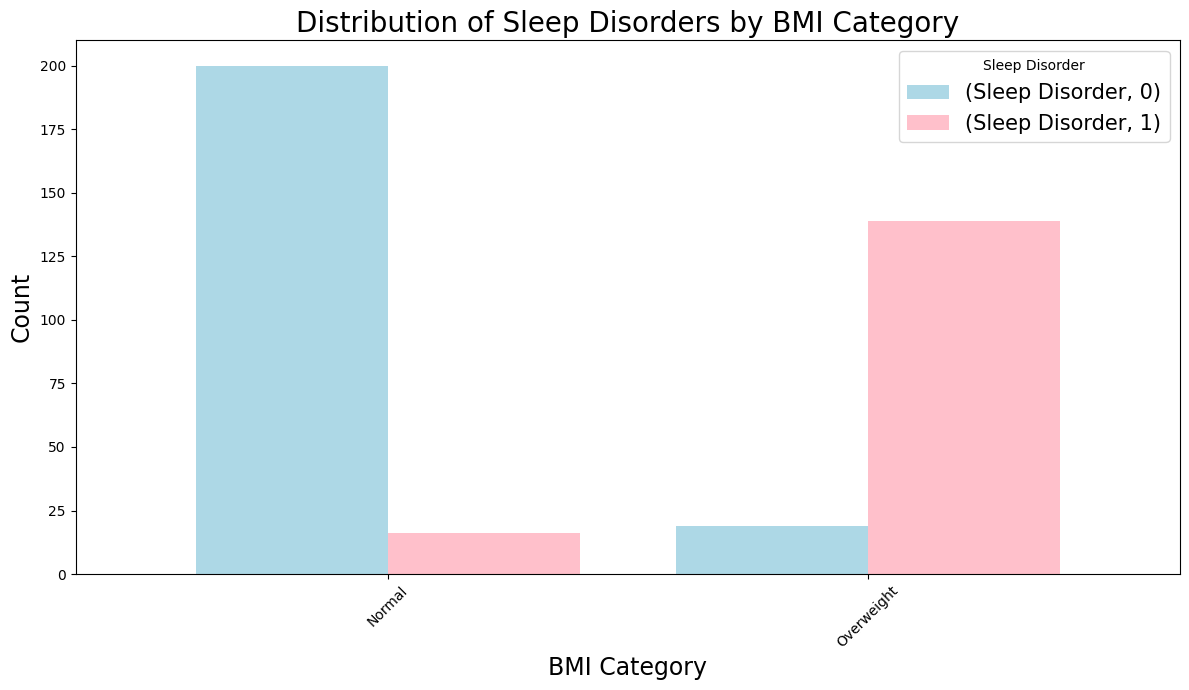

In [357]:
# Pivot table to aggregate the data
pivot_data = data.pivot_table(
    index='BMI Category',
    columns='Sleep Disorder',
    aggfunc={'Sleep Disorder': 'count'}
)
# Plot a bar chart
pivot_data.plot.bar(
    figsize=(12, 7),
    color=['lightblue','pink'],
    width=0.8
)
# Add labels and title
plt.title('Distribution of Sleep Disorders by BMI Category', fontsize=20)
plt.ylabel('Count', fontsize=17)
plt.xlabel('BMI Category', fontsize=17)
plt.legend(title='Sleep Disorder', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [358]:
categorical_columns = data.select_dtypes(include=["object", "category"]).columns

# 初始化 LabelEncoder
label_encoders = {}

# 對每個類別型欄位進行編碼
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # 確保所有值轉為字串處理
    label_encoders[col] = le  # 儲存編碼器以供後續解碼使用

# 檢查結果
print("經過 Label Encoding 的資料：")
print(data.head())

print("\n各欄位的編碼對應：")
for col, le in label_encoders.items():
    print(f"{col}: {list(le.classes_)}")

經過 Label Encoding 的資料：
   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           2             6.1                 1   
1       1   28           1             6.2                 1   
2       1   28           1             6.2                 1   
3       1   28           5             5.9                 0   
4       1   28           5             5.9                 0   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                        1             6             1               0   
1                        2             8             0               0   
2                        2             8             0               0   
3                        0             8             1               1   
4                        0             8             1               1   

   Heart Rate  Daily Steps  Sleep Disorder  
0          77            1               0  
1          75            0               0  
2          7

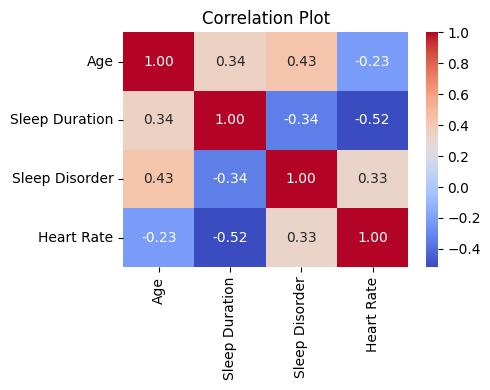

In [359]:
correlation_matrix = data[["Age","Sleep Duration","Sleep Disorder","Heart Rate"]].corr()
# Create a heatmap using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Annotate with correlation coefficients
    fmt=".2f",   # Format the annotations to two decimal places
    cmap="coolwarm",  # Use a diverging colormap
    cbar=True     # Display the color bar
)
# Add title
plt.title("Correlation Plot", fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()

In [360]:
def plotly_boxplot(df , numeric_types , color  , row = None) :
    def gather( df, key, value, cols ):
        id_vars = [ col for col in df.columns if col not in cols ]
        id_values = cols
        var_name = key
        value_name = value
        return pd.melt( df, id_vars, id_values, var_name, value_name )
    numeric_gather = gather( df , 'key', 'value', numeric_types )
    fig = px.box(numeric_gather, x="key", y="value",
                 facet_col="key" ,color = color ,
                 facet_row=row )
    fig.update_yaxes(showticklabels=True , matches=None)
    fig.update_xaxes(showticklabels=True , matches=None)
    fig.show()

In [361]:
plotly_boxplot(data, ["Stress Level", "Sleep Duration"], "Occupation")

In [362]:
plotly_boxplot(data, ["Stress Level", "Sleep Duration"], "BMI Category")

## analysis - split

In [363]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score
import plotly.express as px
import shap

In [364]:
# Prepare the data
X = data.drop(['Sleep Disorder'], axis=1)
y = data['Sleep Disorder']
print(X.shape)
print(y.shape)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print("x train dimensions :",X_train.shape)
print("x test dimensions: ",X_test.shape)
print("y train dimensions :",y_train.shape)
print("y test dimensions :",y_test.shape)

(374, 11)
(374,)
x train dimensions : (299, 11)
x test dimensions:  (75, 11)
y train dimensions : (299,)
y test dimensions : (75,)


In [365]:
x_feature_names = data.drop(['Sleep Disorder'], axis=1).columns
y_label_names = ['Yes','No']

## logistic

In [366]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [367]:
lr_pred_d = log_reg.predict(X_test)
print(f"Accuracy: {log_reg.score(X_test, y_test):.2f}")
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba)}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_pred_d))
print(classification_report(y_test, lr_pred_d))

Accuracy: 0.93
AUC Score: 0.9134199134199135

Confusion Matrix:
 [[40  2]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.94      0.91      0.92        33

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



## random forest

In [368]:
id=pd.read_csv("/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv")

In [369]:
x_feature_names = data.drop(['Sleep Disorder'], axis=1).columns
y_label_names = ['Yes','No']
data['Person ID']=id['Person ID']#13是person id
X = data.drop(['Sleep Disorder'], axis=1).values # 移除y並取得剩下欄位資料
y = data['Sleep Disorder'].values # 取得病人糖尿病結果作為y
# 假設只選擇部分變數

X_traino, X_testo, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train=X_traino[:,:][:,:11]#
X_test=X_testo[:,:][:,:11]#
print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (299, 11)
test shape: (75, 11)


In [370]:
rf = RandomForestClassifier(
    n_estimators=500,       # 樹的數量
    max_depth=None,# 最大深度
    max_features=3,
    random_state=42         # 固定隨機種子
)

rf.fit(X_train, y_train)

rf_pred_class = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [371]:
accuracy = accuracy_score(y_test, rf_pred_class)
conf_matrix = confusion_matrix(y_test, rf_pred_class)
auc_score = roc_auc_score(y_test, y_pred_proba)
class_report = classification_report(y_test, rf_pred_class)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"AUC Score: {auc_score}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 92.00%
AUC Score: 0.9428152492668621

Confusion Matrix:
 [[40  4]
 [ 2 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.88      0.94      0.91        31

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



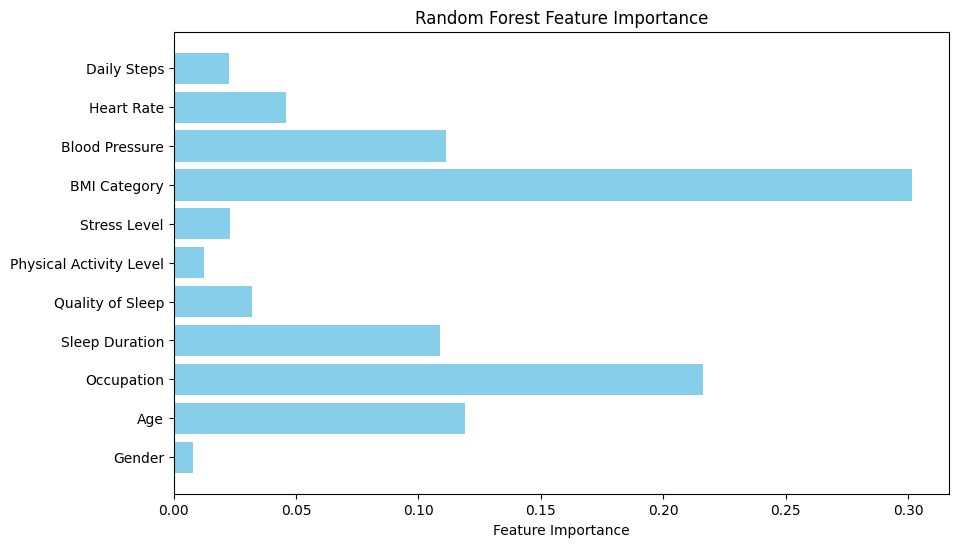

In [372]:
# 特徵重要性分析
feature_importances = rf.feature_importances_

# 視覺化特徵重要性
plt.figure(figsize=(10, 6))
plt.barh(x_feature_names[:11], feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [373]:
rf_explainer = shap.TreeExplainer(model=rf, data=X_train)
shap_values = rf_explainer.shap_values(X_test, check_additivity=False)  # 使用 logit_link
#xgb_explainer = shap.TreeExplainer(model=model, data=X_train, link="logit")
#shap_values = xgb_explainer.shap_values(X_test)
print(shap_values.shape)

(75, 11, 2)


In [374]:
def shap_values_to_list(shap_values, model):
    shap_as_list=[]
    for i in range(len(model.classes_)):
        shap_as_list.append(shap_values[:,:,i])
    return shap_as_list
shap_as_list = shap_values_to_list(shap_values, rf)

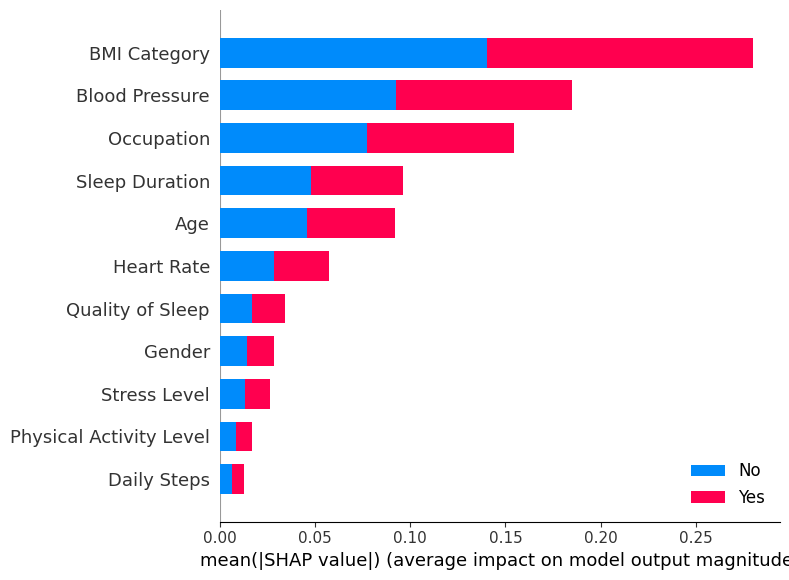

In [375]:
shap.summary_plot(shap_as_list, X_test, plot_type="bar",
         class_names= y_label_names,
         feature_names = x_feature_names[:11])

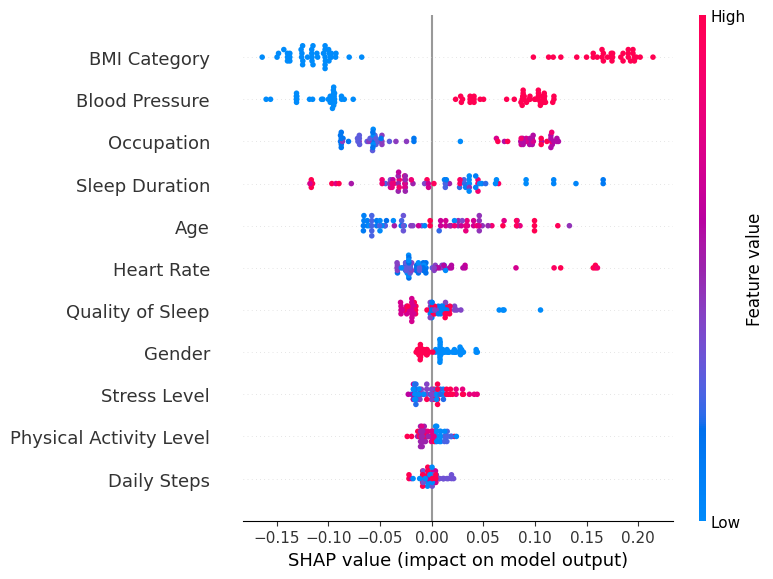

In [376]:
shap.summary_plot(shap_as_list[1], X_test,
         class_names= y_label_names,
         feature_names = x_feature_names[:11])

In [377]:
# 觀察測試集中第一筆資料預測為Yes的重要程度
shap.initjs()
index=73
print(f'測試集第 {index+1} 筆模型原始結果: {y_test[index]}')
print(f'測試集第 {index+1} 筆模型預測結果: {rf.predict_proba(X_test[[index], :])[0]}')
shap.force_plot(rf_explainer.expected_value[1],
        shap_values[:,:,1][index],
        X_test[index],
        feature_names=x_feature_names[:11], link='logit')

測試集第 74 筆模型原始結果: 1
測試集第 74 筆模型預測結果: [0.10095832 0.89904168]


In [378]:
shap.initjs()
shap.force_plot(rf_explainer.expected_value[1], shap_values[:,:,1][:73], X_test[:73], feature_names=x_feature_names[:11], link='logit')

array([ 0., 50.,  4.,  6.,  1.,  4.,  8.,  1.,  1., 75.,  0.])

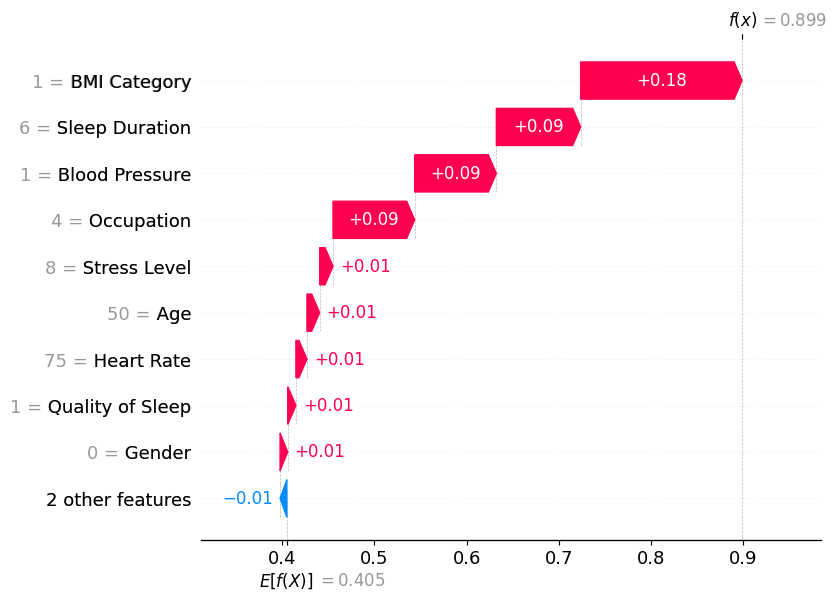

In [379]:
index=73
display(X_test[index])
shap.waterfall_plot(shap.Explanation(values=shap_values[:,:,1][index],
                  base_values=rf_explainer.expected_value[1],
                  data=X_test[index],
                  feature_names=x_feature_names[:11]))


(75, 11, 2)


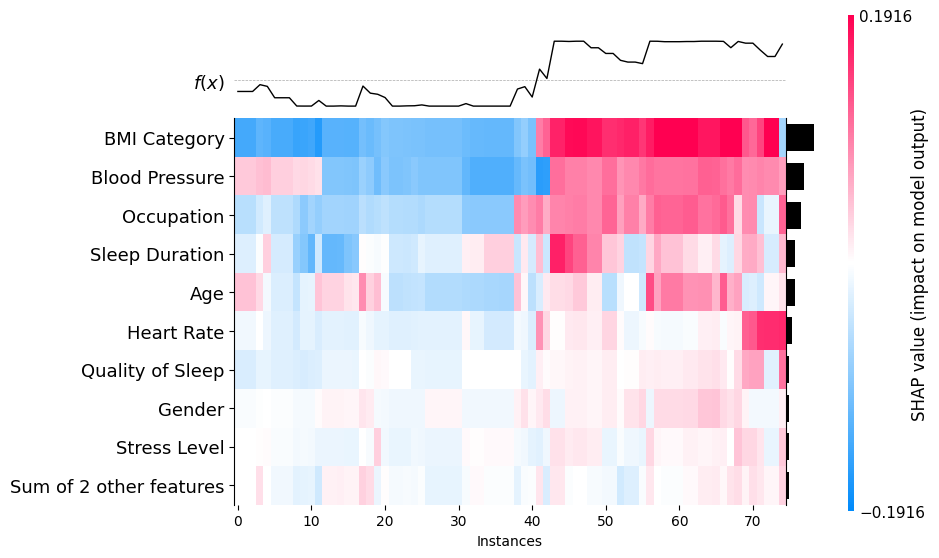

<Axes: xlabel='Instances'>

In [380]:
# 檢查 shap_values 的形狀
print(np.shape(shap_values))  # 應該顯示 (num_samples, num_features)
shap_explanation = shap.Explanation(values=shap_as_list[1],
                   base_values=rf_explainer.expected_value,
                   data=X_test,
                   feature_names=x_feature_names[:11])
shap.plots.heatmap(shap_explanation)


#### 分類錯誤的資料

In [381]:
# 比較預測值與真實值
misclassified_indices = (rf_pred_class != y_test)  # 錯誤分類的布林陣列
# 提取錯誤分類的數據
X_test_misclassified = X_testo[misclassified_indices]
y_test_misclassified = y_test[misclassified_indices]
y_pred_misclassified = rf_pred_class[misclassified_indices]
x_feature_names = data.drop(['Sleep Disorder'], axis=1).columns
# 將錯誤分類數據整理成表格
misclassified_df = pd.DataFrame(X_test_misclassified, columns=x_feature_names)

In [382]:
data_org=pd.read_csv("/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv")

In [383]:
misclassified_data2 = data_org[data_org["Person ID"].isin(misclassified_df["Person ID"].values.tolist())]

misclassified_data2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
67,68,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,Insomnia
68,69,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,NaN
69,70,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,NaN
106,107,Female,37,Nurse,6.1,6,42,6,Overweight,126/83,77,4200,NaN
201,202,Male,43,Engineer,7.8,8,90,5,Normal,130/85,70,8000,Insomnia
359,360,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN


## RANDOM FOREST-篩選變數

In [384]:
data['Person ID']=id['Person ID']#13是person id
selected_features = [12,3,6,7,8,9] #3,6,7,11 #2,3,7
X_selected = data.iloc[:,selected_features].values
selected_features2 = selected_features[1:]
x_feature_names = data.iloc[:,selected_features2].columns
X_traino, X_testo, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
X_train=X_traino[:,:][:,1:]
X_test=X_testo[:,:][:,1:]
print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (299, 5)
test shape: (75, 5)


In [385]:
# 建立 Random Forest 模型
model = RandomForestClassifier(
    n_estimators=500,       # 樹的數量
    max_depth=None,# 最大深度
    max_features=3,
    random_state=42         # 固定隨機種子
)

# 訓練模型
model.fit(X_train, y_train)

# 測試模型
rf_pred_class = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 模型評估
accuracy = accuracy_score(y_test, rf_pred_class)
conf_matrix = confusion_matrix(y_test, rf_pred_class)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
AUC Score: 0.9490469208211143
Confusion Matrix:
[[41  3]
 [ 2 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.57      0.57        44
           1       0.41      0.42      0.41        31

    accuracy                           0.51        75
   macro avg       0.49      0.49      0.49        75
weighted avg       0.51      0.51      0.51        75



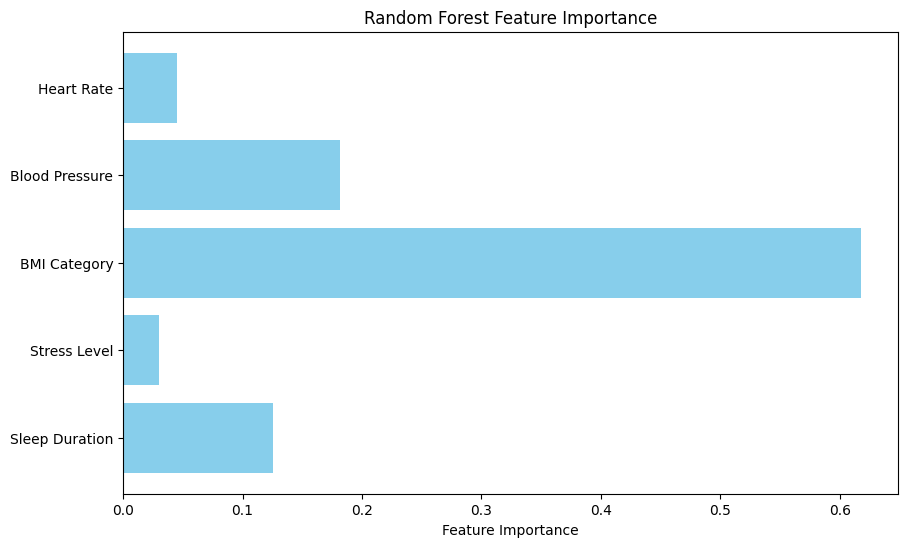

In [386]:
# 特徵重要性分析
feature_importances = model.feature_importances_

# 視覺化特徵重要性
plt.figure(figsize=(10, 6))
plt.barh(x_feature_names, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [387]:
rf_explainer = shap.TreeExplainer(model=model, data=X_train)
shap_values = rf_explainer.shap_values(X_test, check_additivity=False)  # 使用 logit_link
#xgb_explainer = shap.TreeExplainer(model=model, data=X_train, link="logit")
#shap_values = xgb_explainer.shap_values(X_test)
print(shap_values.shape)

(75, 5, 2)


In [388]:
def shap_values_to_list(shap_values, model):
    shap_as_list=[]
    for i in range(len(model.classes_)):
        shap_as_list.append(shap_values[:,:,i])
    return shap_as_list
shap_as_list = shap_values_to_list(shap_values, model)

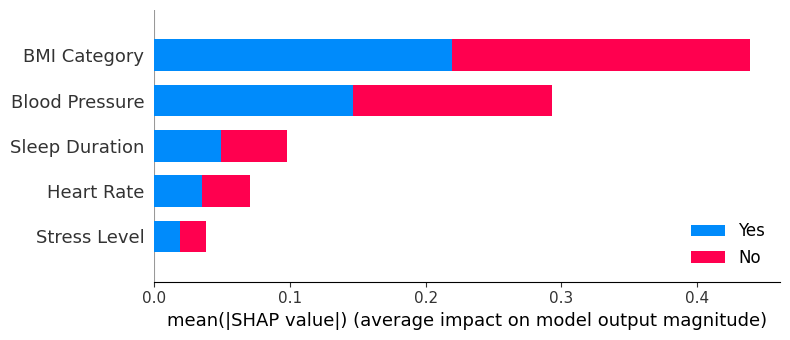

In [389]:
shap.summary_plot(shap_as_list, X_test, plot_type="bar",
         class_names= y_label_names,
         feature_names = x_feature_names)

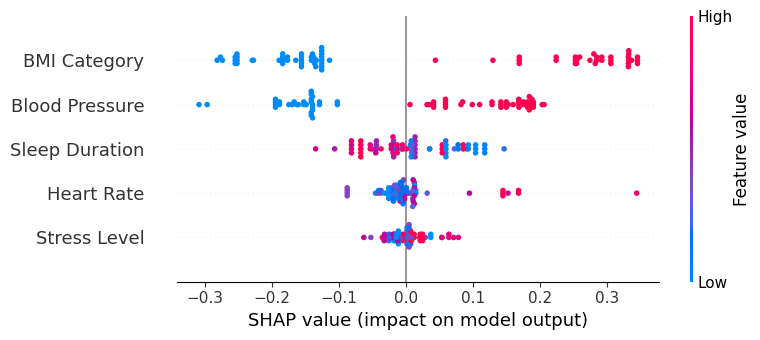

In [390]:
shap.summary_plot(shap_as_list[1], X_test,
         class_names= y_label_names,
         feature_names = x_feature_names)

In [391]:
# 觀察測試集中第一筆資料預測為Yes的重要程度
shap.initjs()
index=73
print(f'測試集第 {index+1} 筆模型原始結果: {y_test[index]}')
print(f'測試集第 {index+1} 筆模型預測結果: {model.predict_proba(X_test[[index], :])[0]}')
shap.force_plot(rf_explainer.expected_value[1],
        shap_values[:,:,1][index],
        X_test[index],
        feature_names=x_feature_names, link='logit')

測試集第 74 筆模型原始結果: 1
測試集第 74 筆模型預測結果: [0.08238297 0.91761703]


In [392]:
shap.initjs()
shap.force_plot(rf_explainer.expected_value[1], shap_values[:,:,1][:73], X_test[:73], feature_names=x_feature_names, link='logit')

array([ 6.,  8.,  1.,  1., 75.])

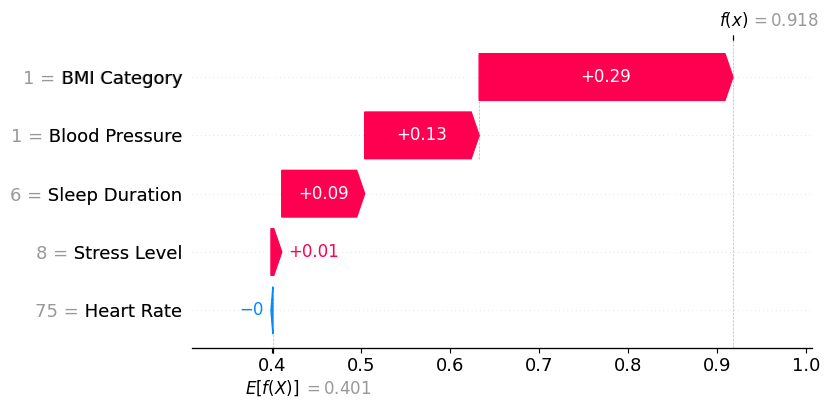

In [393]:
index=73
display(X_test[index])
shap.waterfall_plot(shap.Explanation(values=shap_values[:,:,1][index],
                  base_values=rf_explainer.expected_value[1],
                  data=X_test[index],
                  feature_names=x_feature_names))


(75, 5, 2)


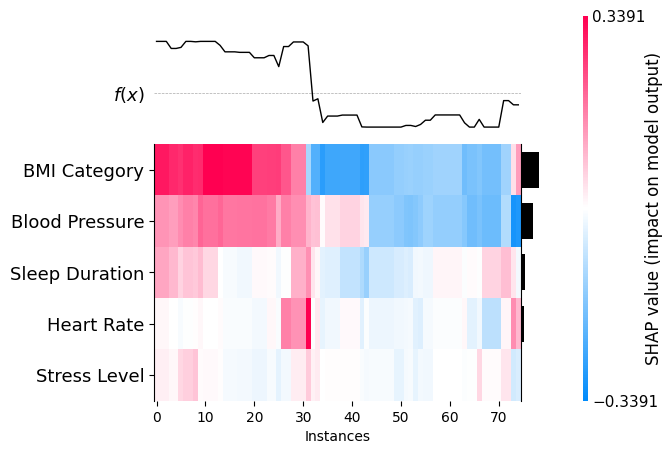

<Axes: xlabel='Instances'>

In [394]:
print(np.shape(shap_values))  # 應該顯示 (num_samples, num_features)
shap_explanation = shap.Explanation(values=shap_as_list[1],
                   base_values=rf_explainer.expected_value,
                   data=X_test,
                   feature_names=x_feature_names)
shap.plots.heatmap(shap_explanation)


#### 分類錯誤的資料

In [395]:
# 比較預測值與真實值
misclassified_indices = (rf_pred_class != y_test)  # 錯誤分類的布林陣列
# 提取錯誤分類的數據
X_test_misclassified = X_testo[misclassified_indices]
y_test_misclassified = y_test[misclassified_indices]
y_pred_misclassified = y_pred_xgb[misclassified_indices]
x_feature_names = data.iloc[:,selected_features].columns
# 將錯誤分類數據整理成表格
misclassified_df = pd.DataFrame(X_test_misclassified, columns=x_feature_names)

In [396]:
data_org=pd.read_csv("/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv")

In [397]:
misclassified_data2 = data_org[data_org["Person ID"].isin(misclassified_df["Person ID"].values.tolist())]

misclassified_data2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
67,68,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,Insomnia
68,69,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,NaN
69,70,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,NaN
201,202,Male,43,Engineer,7.8,8,90,5,Normal,130/85,70,8000,Insomnia
359,360,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN


### CatBoost

In [398]:
from catboost import CatBoostClassifier
# Specify categorical columns (by their names)
# Initialize the CatBoostClassifier with categorical features
CBC = CatBoostClassifier()

# Train the model
CBC.fit(X_train, y_train)

Learning rate set to 0.006152
0:	learn: 0.6861659	total: 3.48ms	remaining: 3.48s
1:	learn: 0.6796544	total: 7.54ms	remaining: 3.76s
2:	learn: 0.6727090	total: 10.5ms	remaining: 3.47s
3:	learn: 0.6669445	total: 13.7ms	remaining: 3.4s
4:	learn: 0.6600334	total: 14.8ms	remaining: 2.94s
5:	learn: 0.6533026	total: 17.1ms	remaining: 2.83s
6:	learn: 0.6471186	total: 20.3ms	remaining: 2.88s
7:	learn: 0.6418461	total: 21.4ms	remaining: 2.65s
8:	learn: 0.6360055	total: 23.6ms	remaining: 2.6s
9:	learn: 0.6299389	total: 24.7ms	remaining: 2.45s
10:	learn: 0.6239935	total: 26.2ms	remaining: 2.36s
11:	learn: 0.6190771	total: 27.5ms	remaining: 2.26s
12:	learn: 0.6130147	total: 29.3ms	remaining: 2.22s
13:	learn: 0.6073386	total: 30.3ms	remaining: 2.13s
14:	learn: 0.6014957	total: 32.3ms	remaining: 2.12s
15:	learn: 0.5958937	total: 33.7ms	remaining: 2.07s
16:	learn: 0.5902476	total: 35.8ms	remaining: 2.07s
17:	learn: 0.5849304	total: 37.9ms	remaining: 2.07s
18:	learn: 0.5794934	total: 39.3ms	remaining: 

In [399]:
CBC_training_score=colored(round(CBC.score(X_train,y_train)*100,2), "magenta",None, attrs=["blink"])
CBC_testing_score=colored(round(CBC.score(X_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("CBC training score :",CBC_training_score)
print("CBC testing score :",CBC_testing_score)

CBC training score : 93.98
CBC testing score : 93.33


In [400]:
CBC_y_pred=CBC.predict(X_test)

accuracy = accuracy_score(y_test, CBC_y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
y_pred_proba = CBC.predict_proba(X_test)[:, 1]
print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba)}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, CBC_y_pred))
print("\nClassification Report:\n", classification_report(y_test, CBC_y_pred))

Accuracy: 93.33%
AUC Score: 0.9596774193548386

Confusion Matrix:
 [[41  3]
 [ 2 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.91      0.94      0.92        31

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



## gradient boost

In [401]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(X_train,y_train)

In [402]:
GBC_training_score=colored(round(GBC.score(X_train,y_train)*100,2), "magenta",None, attrs=["blink"])
GBC_testing_score=colored(round(GBC.score(X_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("GBC training score :",GBC_training_score)
print("GBC testing score :",GBC_testing_score)

GBC training score : 93.98
GBC testing score : 93.33


In [403]:
GBC_y_pred=GBC.predict(X_test)
accuracy = accuracy_score(y_test, GBC_y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
y_pred_proba = GBC.predict_proba(X_test)[:, 1]
print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba)}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, GBC_y_pred))
print("\nClassification Report:\n", classification_report(y_test, GBC_y_pred))

Accuracy: 93.33%
AUC Score: 0.9611436950146628

Confusion Matrix:
 [[41  3]
 [ 2 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.91      0.94      0.92        31

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



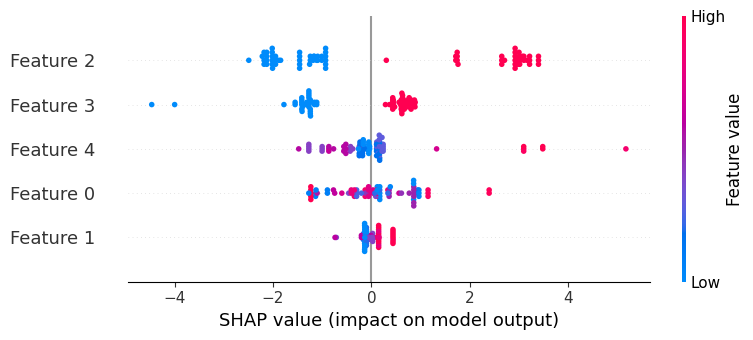

In [404]:
shap_values = shap.TreeExplainer(GBC).shap_values(X_test)
shap.summary_plot(shap_values, X_test,class_names=['0','1'])

## xgboost

In [405]:
id=pd.read_csv("/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv")

In [406]:
x_feature_names = data.drop(['Sleep Disorder'], axis=1).columns
y_label_names = ['Yes','No']
data['Person ID']=id['Person ID']#13是person id
X = data.drop(['Sleep Disorder'], axis=1).values # 移除y並取得剩下欄位資料
y = data['Sleep Disorder'].values # 取得病人糖尿病結果作為y
# 假設只選擇部分變數

X_traino, X_testo, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train=X_traino[:,:][:,:11]#
X_test=X_testo[:,:][:,:11]#
print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (299, 11)
test shape: (75, 11)


In [407]:
model = xgb.XGBClassifier(
    #use_label_encoder=False,
    # 禁用舊版的 Label Encoding
    eval_metric="logloss",    # 選擇評估指標
    n_estimators=100,         # 樹的數量
    max_depth=6,              # 樹的深度
    learning_rate=0.1,        # 學習率
    subsample=0.8,            # 子樣本比例
    colsample_bytree=0.8      # 特徵子集比例
)

# 使用訓練資料訓練模型
model.fit(X_train, y_train)
# 預測
y_pred_xgb = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [408]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba)}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 50.67%
AUC Score: 0.9505131964809385

Confusion Matrix:
 [[40  4]
 [ 2 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.88      0.94      0.91        31

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [409]:
# 獲取特徵重要性
importance = model.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": x_feature_names[:11],
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print("特徵重要性排序：")
print(feature_importance)

特徵重要性排序：
                    Feature  Importance
7              BMI Category    0.654801
8            Blood Pressure    0.106204
2                Occupation    0.081272
4          Quality of Sleep    0.050208
9                Heart Rate    0.025662
6              Stress Level    0.016261
1                       Age    0.014849
0                    Gender    0.012960
10              Daily Steps    0.012776
3            Sleep Duration    0.012686
5   Physical Activity Level    0.012321


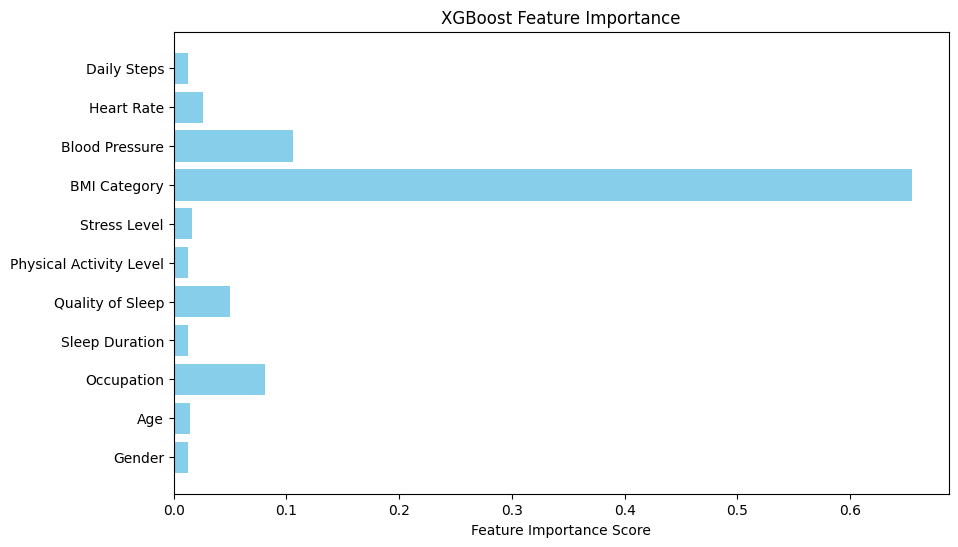

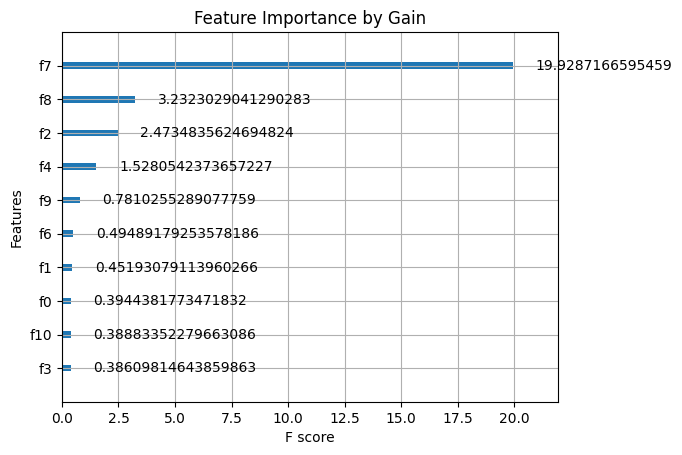

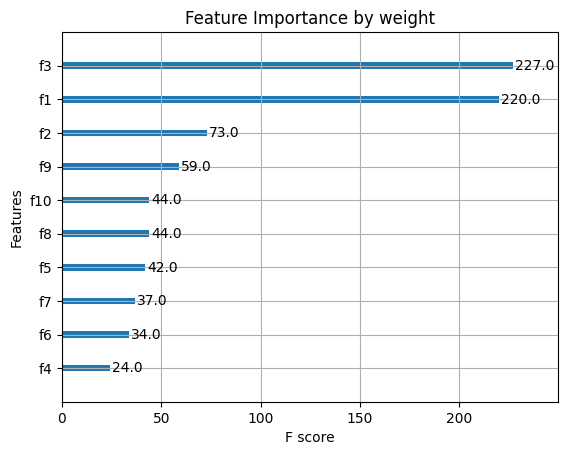

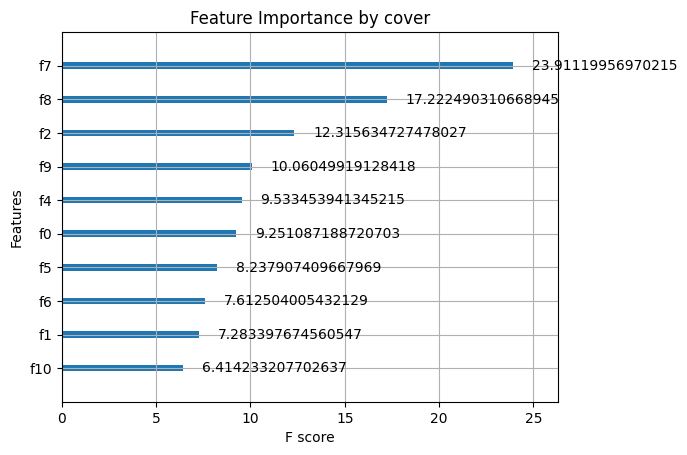

In [410]:
# 使用內建方法顯示特徵重要性
importances = model.feature_importances_

# 視覺化特徵重要性
plt.figure(figsize=(10, 6))
plt.barh(x_feature_names[:11], importances, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("XGBoost Feature Importance")
plt.show()

# 內建的特徵重要性圖（基於 Gain）
xgb.plot_importance(model,importance_type="gain", max_num_features=10, title="Feature Importance by Gain")
plt.show()
# 內建的特徵重要性圖（基於 weight）
xgb.plot_importance(model,importance_type="weight", max_num_features=10, title="Feature Importance by weight")
plt.show()
# 內建的特徵重要性圖（基於 weight）
xgb.plot_importance(model,importance_type="cover", max_num_features=10, title="Feature Importance by cover")
plt.show()

In [411]:
xgb_explainer = shap.TreeExplainer(model=model, data=X_train)
shap_values = xgb_explainer.shap_values(X_test)  # 使用 logit_link
#xgb_explainer = shap.TreeExplainer(model=model, data=X_train, link="logit")
#shap_values = xgb_explainer.shap_values(X_test)
print(shap_values.shape)

(75, 11)


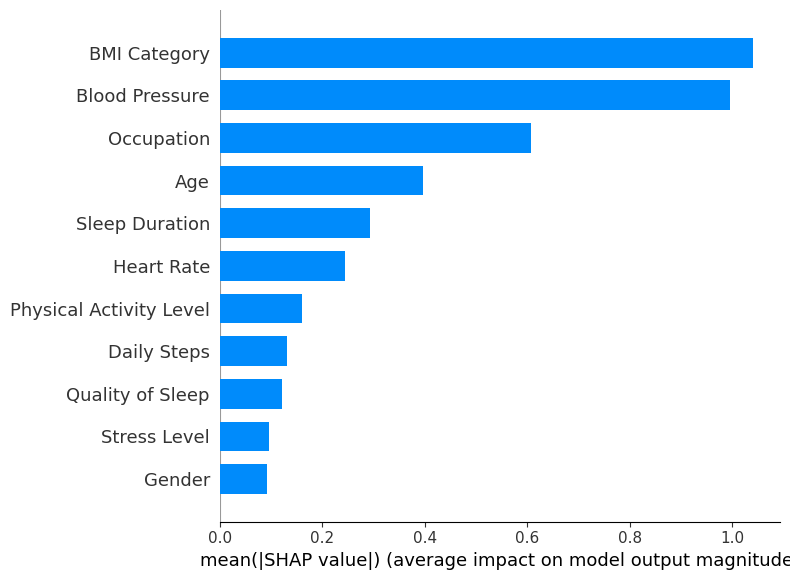

In [412]:
shap.summary_plot(shap_values, X_test, plot_type="bar",
         class_names= y_label_names,
         feature_names = x_feature_names)

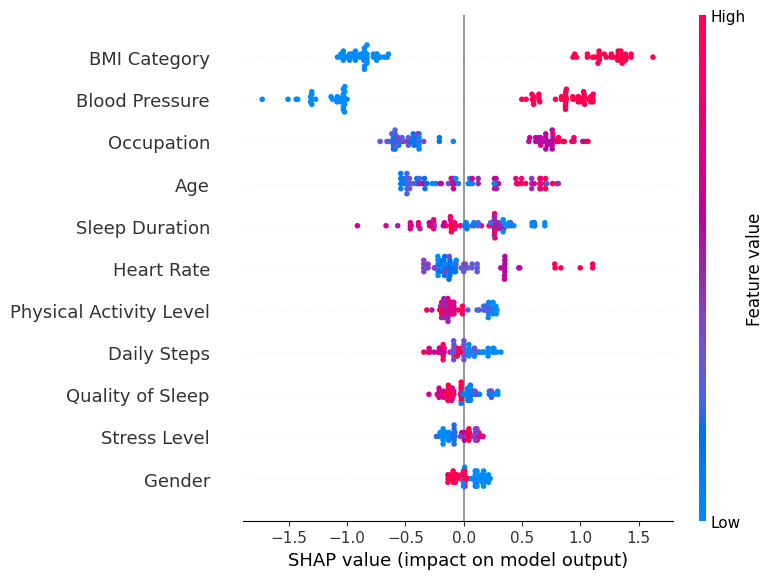

In [413]:
shap.summary_plot(shap_values, X_test,
         class_names= y_label_names,
         feature_names = x_feature_names)

In [414]:
# 觀察測試集中第一筆資料預測為Yes的重要程度
shap.initjs()
index=73
sample = X_test[index:index + 1]
prediction = model.predict(sample)[0]
pred_proba = model.predict_proba(sample)[:, 1]
print(f'測試集第 {index+1} 筆模型原始結果: {y_test[index:index+1]}')
print(f'測試集第 {index+1} 筆模型預測結果: {pred_proba}、label:{prediction}')
shap.force_plot(xgb_explainer.expected_value,
        shap_values[:,:][index],
        X_test[index],
        feature_names=x_feature_names[:11])

測試集第 74 筆模型原始結果: [1]
測試集第 74 筆模型預測結果: [0.94129425]、label:1


array([ 0., 50.,  4.,  6.,  1.,  4.,  8.,  1.,  1., 75.,  0.])

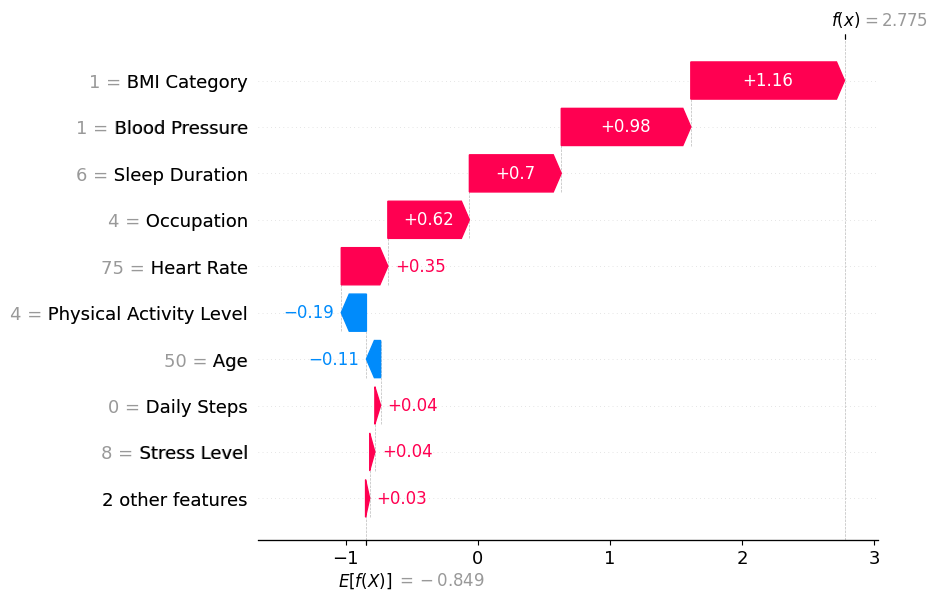

In [415]:
index=73
display(X_test[index,:])
shap.waterfall_plot(shap.Explanation(values=shap_values[:,:][index],
                  base_values=xgb_explainer.expected_value,
                  data=X_test[index,:],
                  feature_names=x_feature_names[:11]))

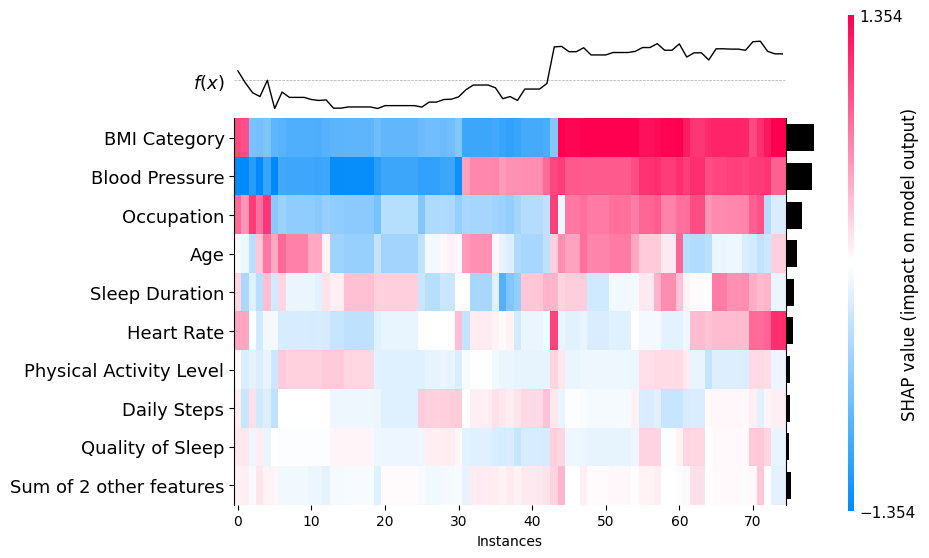

<Axes: xlabel='Instances'>

In [416]:
shap_explanation = shap.Explanation(values=shap_values,
                  base_values=xgb_explainer.expected_value,
                  data=X_test,
                  feature_names=x_feature_names[:11])
shap.plots.heatmap(shap_explanation)

#### 分類錯誤的資料

In [417]:
# 比較預測值與真實值
misclassified_indices = (y_pred_xgb != y_test)  # 錯誤分類的布林陣列
# 提取錯誤分類的數據
X_test_misclassified = X_testo[misclassified_indices]
y_test_misclassified = y_test[misclassified_indices]
y_pred_misclassified = y_pred_xgb[misclassified_indices]
x_feature_names = data.drop(['Sleep Disorder'], axis=1).columns
# 將錯誤分類數據整理成表格
misclassified_df = pd.DataFrame(X_test_misclassified, columns=x_feature_names)

In [418]:
data_org=pd.read_csv("/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv")

In [419]:
misclassified_data2 = data_org[data_org["Person ID"].isin(misclassified_df["Person ID"].values.tolist())]

misclassified_data2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
67,68,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,Insomnia
68,69,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,NaN
69,70,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,NaN
106,107,Female,37,Nurse,6.1,6,42,6,Overweight,126/83,77,4200,NaN
201,202,Male,43,Engineer,7.8,8,90,5,Normal,130/85,70,8000,Insomnia
359,360,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN


#### 篩選變數後

In [420]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# 初始化 KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=45)
selected_features = [3,6,7,8] #2 8 11
# 使用選定的特徵
X_try = data.iloc[:, selected_features].values

# 進行交叉驗證
cv_results = []

for train_idx, valid_idx in kfold.split(X_try):
    X_train, X_valid = X_try[train_idx], X_try[valid_idx]
    y_train, y_valid = y[train_idx], y[valid_idx]

    # 轉換為 DMatrix 格式
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)

    # 訓練模型
    model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    )

    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)

    # 預測並評估
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    cv_results.append(accuracy)

# 輸出結果
print("Cross-Validation Accuracy Scores:", cv_results)
print("Mean Accuracy:", np.mean(cv_results))


[0]	validation_0-logloss:0.60366
[1]	validation_0-logloss:0.55226
[2]	validation_0-logloss:0.50867
[3]	validation_0-logloss:0.47189
[4]	validation_0-logloss:0.43713
[5]	validation_0-logloss:0.41044
[6]	validation_0-logloss:0.38532
[7]	validation_0-logloss:0.36298
[8]	validation_0-logloss:0.34366
[9]	validation_0-logloss:0.32678
[10]	validation_0-logloss:0.31211
[11]	validation_0-logloss:0.30072
[12]	validation_0-logloss:0.28887
[13]	validation_0-logloss:0.28053
[14]	validation_0-logloss:0.27039
[15]	validation_0-logloss:0.26143
[16]	validation_0-logloss:0.25432
[17]	validation_0-logloss:0.24804
[18]	validation_0-logloss:0.24343
[19]	validation_0-logloss:0.23981
[20]	validation_0-logloss:0.23593
[21]	validation_0-logloss:0.23418
[22]	validation_0-logloss:0.23194
[23]	validation_0-logloss:0.22714
[24]	validation_0-logloss:0.22343
[25]	validation_0-logloss:0.22244
[26]	validation_0-logloss:0.22136
[27]	validation_0-logloss:0.21938
[28]	validation_0-logloss:0.21673
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[52]	validation_0-logloss:0.18725
[53]	validation_0-logloss:0.18518
[54]	validation_0-logloss:0.18495
[55]	validation_0-logloss:0.18418
[56]	validation_0-logloss:0.18149
[57]	validation_0-logloss:0.18283
[58]	validation_0-logloss:0.18263
[59]	validation_0-logloss:0.18154
[60]	validation_0-logloss:0.18057
[61]	validation_0-logloss:0.18112
[62]	validation_0-logloss:0.18037
[63]	validation_0-logloss:0.18076
[64]	validation_0-logloss:0.17945
[65]	validation_0-logloss:0.18004
[66]	validation_0-logloss:0.17882
[67]	validation_0-logloss:0.17851
[68]	validation_0-logloss:0.17914
[69]	validation_0-logloss:0.17876
[70]	validation_0-logloss:0.18000
[71]	validation_0-logloss:0.17851
[72]	validation_0-logloss:0.17895
[73]	validation_0-logloss:0.17816
[74]	validation_0-logloss:0.17647
[75]	validation_0-logloss:0.17554
[76]	validation_0-logloss:0.17412
[77]	validation_0-logloss:0.17326
[78]	validation_0-logloss:0.17276
[79]	validation_0-logloss:0.17142
[80]	validation_0-logloss:0.16931
[81]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[38]	validation_0-logloss:0.49783
[39]	validation_0-logloss:0.49932
[40]	validation_0-logloss:0.50407
[41]	validation_0-logloss:0.50692
[42]	validation_0-logloss:0.51309
[43]	validation_0-logloss:0.51811
[44]	validation_0-logloss:0.52121
[45]	validation_0-logloss:0.52772
[46]	validation_0-logloss:0.52842
[47]	validation_0-logloss:0.53074
[48]	validation_0-logloss:0.53264
[49]	validation_0-logloss:0.53596
[50]	validation_0-logloss:0.54132
[51]	validation_0-logloss:0.54230
[52]	validation_0-logloss:0.54508
[53]	validation_0-logloss:0.54785
[54]	validation_0-logloss:0.55111
[55]	validation_0-logloss:0.55553
[56]	validation_0-logloss:0.55722
[57]	validation_0-logloss:0.55987
[58]	validation_0-logloss:0.56206
[59]	validation_0-logloss:0.56422
[60]	validation_0-logloss:0.56397
[61]	validation_0-logloss:0.56454
[62]	validation_0-logloss:0.56953
[63]	validation_0-logloss:0.57028
[64]	validation_0-logloss:0.57258
[65]	validation_0-logloss:0.57241
[66]	validation_0-logloss:0.57508
[67]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[46]	validation_0-logloss:0.11076
[47]	validation_0-logloss:0.10939
[48]	validation_0-logloss:0.11026
[49]	validation_0-logloss:0.11044
[50]	validation_0-logloss:0.11175
[51]	validation_0-logloss:0.11191
[52]	validation_0-logloss:0.11160
[53]	validation_0-logloss:0.11059
[54]	validation_0-logloss:0.10959
[55]	validation_0-logloss:0.10919
[56]	validation_0-logloss:0.10996
[57]	validation_0-logloss:0.10940
[58]	validation_0-logloss:0.10893
[59]	validation_0-logloss:0.11032
[60]	validation_0-logloss:0.10944
[61]	validation_0-logloss:0.10850
[62]	validation_0-logloss:0.10767
[63]	validation_0-logloss:0.10815
[64]	validation_0-logloss:0.10820
[65]	validation_0-logloss:0.10786
[66]	validation_0-logloss:0.10852
[67]	validation_0-logloss:0.10774
[68]	validation_0-logloss:0.10698
[69]	validation_0-logloss:0.10645
[70]	validation_0-logloss:0.10531
[71]	validation_0-logloss:0.10499
[72]	validation_0-logloss:0.10525
[73]	validation_0-logloss:0.10436
[74]	validation_0-logloss:0.10454
[75]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[33]	validation_0-logloss:0.23834
[34]	validation_0-logloss:0.23775
[35]	validation_0-logloss:0.23840
[36]	validation_0-logloss:0.23661
[37]	validation_0-logloss:0.23644
[38]	validation_0-logloss:0.23730
[39]	validation_0-logloss:0.23718
[40]	validation_0-logloss:0.23574
[41]	validation_0-logloss:0.23455
[42]	validation_0-logloss:0.23467
[43]	validation_0-logloss:0.23369
[44]	validation_0-logloss:0.23294
[45]	validation_0-logloss:0.23003
[46]	validation_0-logloss:0.23137
[47]	validation_0-logloss:0.23162
[48]	validation_0-logloss:0.23027
[49]	validation_0-logloss:0.22902
[50]	validation_0-logloss:0.22773
[51]	validation_0-logloss:0.22835
[52]	validation_0-logloss:0.22814
[53]	validation_0-logloss:0.22931
[54]	validation_0-logloss:0.23008
[55]	validation_0-logloss:0.22897
[56]	validation_0-logloss:0.22804
[57]	validation_0-logloss:0.22753
[58]	validation_0-logloss:0.22727
[59]	validation_0-logloss:0.22826
[60]	validation_0-logloss:0.22838
[61]	validation_0-logloss:0.22647
[62]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[38]	validation_0-logloss:0.28395
[39]	validation_0-logloss:0.28529
[40]	validation_0-logloss:0.28743
[41]	validation_0-logloss:0.28959
[42]	validation_0-logloss:0.28894
[43]	validation_0-logloss:0.28593
[44]	validation_0-logloss:0.28751
[45]	validation_0-logloss:0.28678
[46]	validation_0-logloss:0.28931
[47]	validation_0-logloss:0.28848
[48]	validation_0-logloss:0.28871
[49]	validation_0-logloss:0.28928
[50]	validation_0-logloss:0.29075
[51]	validation_0-logloss:0.29085
[52]	validation_0-logloss:0.29354
[53]	validation_0-logloss:0.29663
[54]	validation_0-logloss:0.29604
[55]	validation_0-logloss:0.29658
[56]	validation_0-logloss:0.29547
[57]	validation_0-logloss:0.29555
[58]	validation_0-logloss:0.29628
[59]	validation_0-logloss:0.29277
[60]	validation_0-logloss:0.29207
[61]	validation_0-logloss:0.29104
[62]	validation_0-logloss:0.29228
[63]	validation_0-logloss:0.29134
[64]	validation_0-logloss:0.29004
[65]	validation_0-logloss:0.28984
[66]	validation_0-logloss:0.28810
[67]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[42]	validation_0-logloss:0.22870
[43]	validation_0-logloss:0.22853
[44]	validation_0-logloss:0.22736
[45]	validation_0-logloss:0.22729
[46]	validation_0-logloss:0.22494
[47]	validation_0-logloss:0.22550
[48]	validation_0-logloss:0.22588
[49]	validation_0-logloss:0.22473
[50]	validation_0-logloss:0.22514
[51]	validation_0-logloss:0.22509
[52]	validation_0-logloss:0.22665
[53]	validation_0-logloss:0.22562
[54]	validation_0-logloss:0.22470
[55]	validation_0-logloss:0.22362
[56]	validation_0-logloss:0.22208
[57]	validation_0-logloss:0.22064
[58]	validation_0-logloss:0.22214
[59]	validation_0-logloss:0.22217
[60]	validation_0-logloss:0.22383
[61]	validation_0-logloss:0.22416
[62]	validation_0-logloss:0.22244
[63]	validation_0-logloss:0.22145
[64]	validation_0-logloss:0.21994
[65]	validation_0-logloss:0.21839
[66]	validation_0-logloss:0.21615
[67]	validation_0-logloss:0.21401
[68]	validation_0-logloss:0.21401
[69]	validation_0-logloss:0.21266
[70]	validation_0-logloss:0.21273
[71]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[48]	validation_0-logloss:0.23601
[49]	validation_0-logloss:0.23496
[50]	validation_0-logloss:0.23594
[51]	validation_0-logloss:0.23560
[52]	validation_0-logloss:0.23459
[53]	validation_0-logloss:0.23629
[54]	validation_0-logloss:0.23527
[55]	validation_0-logloss:0.23655
[56]	validation_0-logloss:0.23722
[57]	validation_0-logloss:0.23660
[58]	validation_0-logloss:0.23652
[59]	validation_0-logloss:0.23595
[60]	validation_0-logloss:0.23492
[61]	validation_0-logloss:0.23529
[62]	validation_0-logloss:0.23416
[63]	validation_0-logloss:0.23381
[64]	validation_0-logloss:0.23288
[65]	validation_0-logloss:0.23334
[66]	validation_0-logloss:0.23375
[67]	validation_0-logloss:0.23341
[68]	validation_0-logloss:0.23206
[69]	validation_0-logloss:0.23231
[70]	validation_0-logloss:0.23168
[71]	validation_0-logloss:0.23205
[72]	validation_0-logloss:0.23111
[73]	validation_0-logloss:0.23211
[74]	validation_0-logloss:0.23196
[75]	validation_0-logloss:0.23315
[76]	validation_0-logloss:0.23330
[77]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[49]	validation_0-logloss:0.22404
[50]	validation_0-logloss:0.22301
[51]	validation_0-logloss:0.22564
[52]	validation_0-logloss:0.22566
[53]	validation_0-logloss:0.22741
[54]	validation_0-logloss:0.22551
[55]	validation_0-logloss:0.22351
[56]	validation_0-logloss:0.22263
[57]	validation_0-logloss:0.22290
[58]	validation_0-logloss:0.22353
[59]	validation_0-logloss:0.22230
[60]	validation_0-logloss:0.21999
[61]	validation_0-logloss:0.22067
[62]	validation_0-logloss:0.22093
[63]	validation_0-logloss:0.22047
[64]	validation_0-logloss:0.21996
[65]	validation_0-logloss:0.22104
[66]	validation_0-logloss:0.22066
[67]	validation_0-logloss:0.22032
[68]	validation_0-logloss:0.22169
[69]	validation_0-logloss:0.22030
[70]	validation_0-logloss:0.21987
[71]	validation_0-logloss:0.22002
[72]	validation_0-logloss:0.21910
[73]	validation_0-logloss:0.22023
[74]	validation_0-logloss:0.22051
[75]	validation_0-logloss:0.22060
[76]	validation_0-logloss:0.22102
[77]	validation_0-logloss:0.21973
[78]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[45]	validation_0-logloss:0.33811
[46]	validation_0-logloss:0.34055
[47]	validation_0-logloss:0.34441
[48]	validation_0-logloss:0.34667
[49]	validation_0-logloss:0.34988
[50]	validation_0-logloss:0.35437
[51]	validation_0-logloss:0.35358
[52]	validation_0-logloss:0.35483
[53]	validation_0-logloss:0.35430
[54]	validation_0-logloss:0.35165
[55]	validation_0-logloss:0.35142
[56]	validation_0-logloss:0.35179
[57]	validation_0-logloss:0.35413
[58]	validation_0-logloss:0.35694
[59]	validation_0-logloss:0.35674
[60]	validation_0-logloss:0.35717
[61]	validation_0-logloss:0.35855
[62]	validation_0-logloss:0.36089
[63]	validation_0-logloss:0.36081
[64]	validation_0-logloss:0.35984
[65]	validation_0-logloss:0.36038
[66]	validation_0-logloss:0.35984
[67]	validation_0-logloss:0.36003
[68]	validation_0-logloss:0.35871
[69]	validation_0-logloss:0.35954
[70]	validation_0-logloss:0.36022
[71]	validation_0-logloss:0.36246
[72]	validation_0-logloss:0.36679
[73]	validation_0-logloss:0.36700
[74]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[32]	validation_0-logloss:0.28852
[33]	validation_0-logloss:0.28848
[34]	validation_0-logloss:0.28995
[35]	validation_0-logloss:0.28867
[36]	validation_0-logloss:0.28940
[37]	validation_0-logloss:0.28688
[38]	validation_0-logloss:0.28712
[39]	validation_0-logloss:0.28894
[40]	validation_0-logloss:0.29037
[41]	validation_0-logloss:0.29172
[42]	validation_0-logloss:0.29153
[43]	validation_0-logloss:0.29190
[44]	validation_0-logloss:0.29295
[45]	validation_0-logloss:0.29177
[46]	validation_0-logloss:0.29093
[47]	validation_0-logloss:0.29061
[48]	validation_0-logloss:0.29049
[49]	validation_0-logloss:0.29087
[50]	validation_0-logloss:0.28959
[51]	validation_0-logloss:0.28931
[52]	validation_0-logloss:0.28844
[53]	validation_0-logloss:0.28976
[54]	validation_0-logloss:0.28987
[55]	validation_0-logloss:0.29085
[56]	validation_0-logloss:0.29126
[57]	validation_0-logloss:0.29059
[58]	validation_0-logloss:0.28850
[59]	validation_0-logloss:0.28848
[60]	validation_0-logloss:0.28972
[61]	validatio

In [421]:
# 假設只選擇部分變數
data['Person ID']=id['Person ID']#13是person id
selected_features = [12,3,6,7,8] #3,7,11 #6,7,8/9,11 #3,6,7,11 #2,3,7
X_selected = data.iloc[:,selected_features].values
selected_features2 = selected_features[1:]
x_feature_names = data.iloc[:,selected_features2].columns
X_traino, X_testo, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
X_train=X_traino[:,:][:,1:]
X_test=X_testo[:,:][:,1:]
print('train shape:', X_train.shape)
print('test shape:', X_test.shape)
# 訓練模型
model = xgb.XGBClassifier(
    use_label_encoder=False,
    # 禁用舊版的 Label Encoding
    eval_metric="logloss",    # 選擇評估指標
    n_estimators=100,         # 樹的數量
    max_depth=6,              # 樹的深度
    learning_rate=0.1,        # 學習率
    subsample=0.8,            # 子樣本比例
    colsample_bytree=0.8      # 特徵子集比例
)
model.fit(X_train, y_train)

# 測試模型
y_pred_xgb = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 模型評估
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


train shape: (299, 4)
test shape: (75, 4)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.9333333333333333
AUC Score: 0.9655425219941349
Confusion Matrix:
[[41  3]
 [ 2 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.91      0.94      0.92        31

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



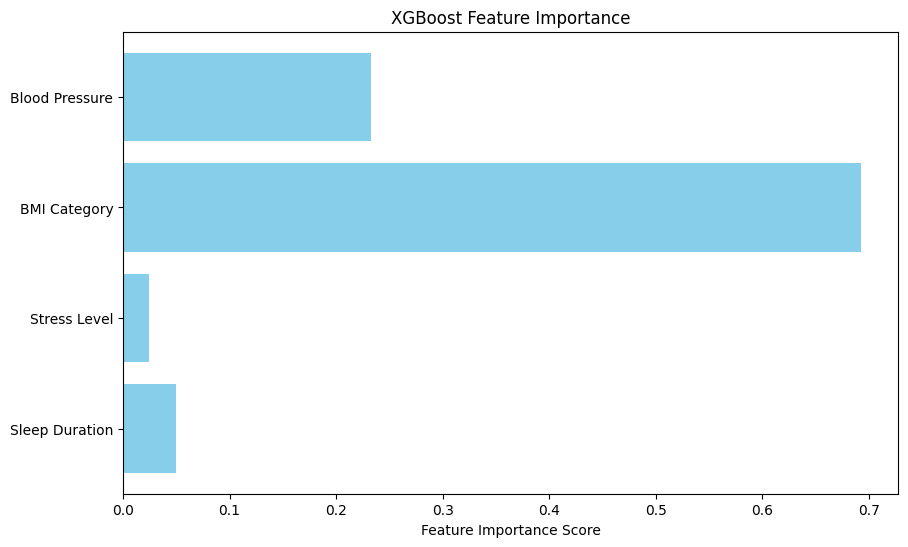

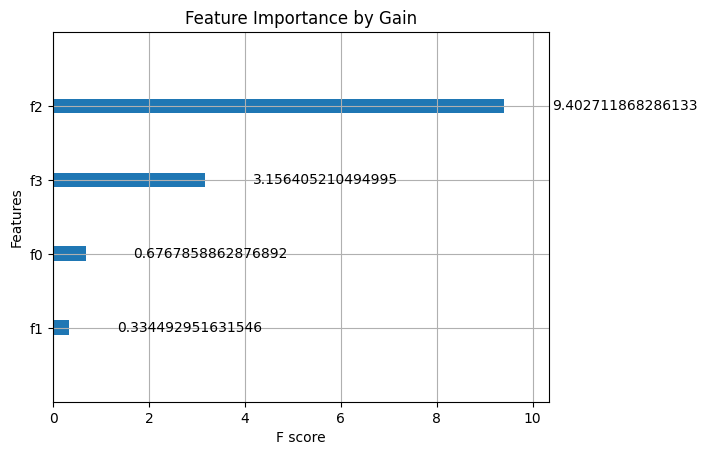

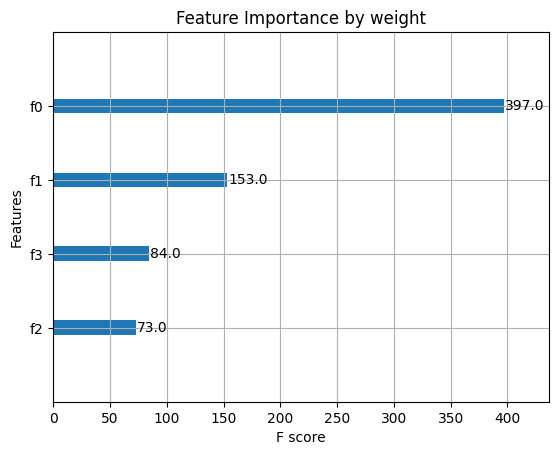

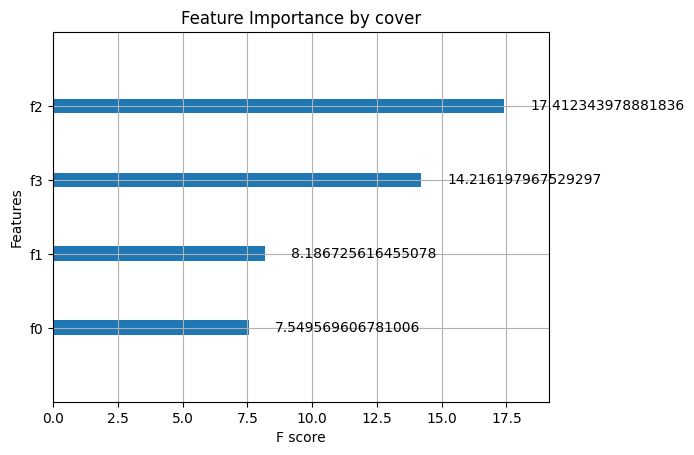

In [422]:
# 使用內建方法顯示特徵重要性
importances = model.feature_importances_

# 視覺化特徵重要性
plt.figure(figsize=(10, 6))
plt.barh(x_feature_names, importances, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("XGBoost Feature Importance")
plt.show()

# 內建的特徵重要性圖（基於 Gain）
xgb.plot_importance(model,importance_type="gain", max_num_features=10, title="Feature Importance by Gain")
plt.show()
# 內建的特徵重要性圖（基於 weight）
xgb.plot_importance(model,importance_type="weight", max_num_features=10, title="Feature Importance by weight")
plt.show()
# 內建的特徵重要性圖（基於 weight）
xgb.plot_importance(model,importance_type="cover", max_num_features=10, title="Feature Importance by cover")
plt.show()

In [423]:
xgb_explainer = shap.TreeExplainer(model=model, data=X_train)
shap_values = xgb_explainer.shap_values(X_test)  # 使用 logit_link
#xgb_explainer = shap.TreeExplainer(model=model, data=X_train, link="logit")
#shap_values = xgb_explainer.shap_values(X_test)
print(shap_values.shape)

(75, 4)


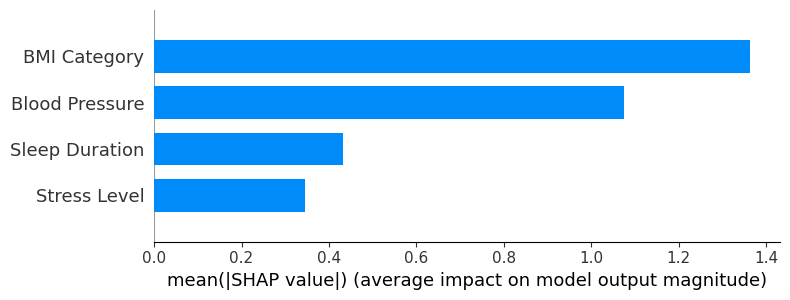

In [424]:
shap.summary_plot(shap_values, X_test, plot_type="bar",
         class_names= y_label_names,
         feature_names = x_feature_names)

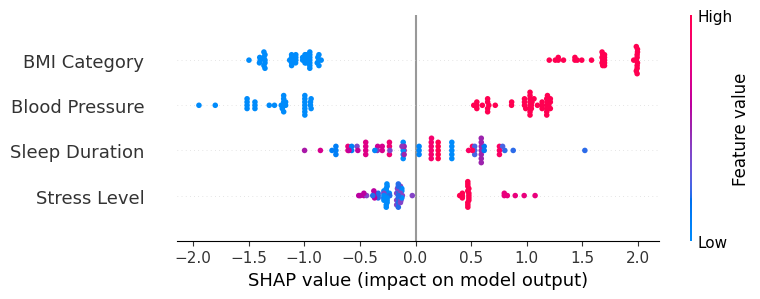

In [425]:
shap.summary_plot(shap_values, X_test,
         class_names= y_label_names,
         feature_names = x_feature_names)

In [426]:
# 觀察測試集中第一筆資料預測為Yes的重要程度
shap.initjs()
index=73
sample = X_test[index:index + 1]
prediction = model.predict(sample)[0]
pred_proba = model.predict_proba(sample)[:, 1]
print(f'測試集第 {index+1} 筆模型原始結果: {y_test[index:index+1]}')
print(f'測試集第 {index+1} 筆模型預測結果: {pred_proba}、label:{prediction}')
shap.force_plot(xgb_explainer.expected_value,
        shap_values[:,:][index],
        X_test[index],
        feature_names=x_feature_names)

測試集第 74 筆模型原始結果: [1]
測試集第 74 筆模型預測結果: [0.9504557]、label:1


array([6., 8., 1., 1.])

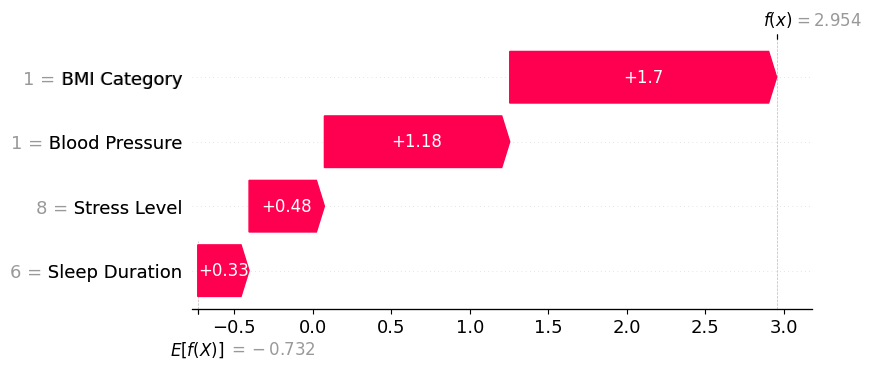

In [427]:
index=73
display(X_test[index,:])
shap.waterfall_plot(shap.Explanation(values=shap_values[:,:][index],
                  base_values=xgb_explainer.expected_value,
                  data=X_test[index,:],
                  feature_names=x_feature_names))

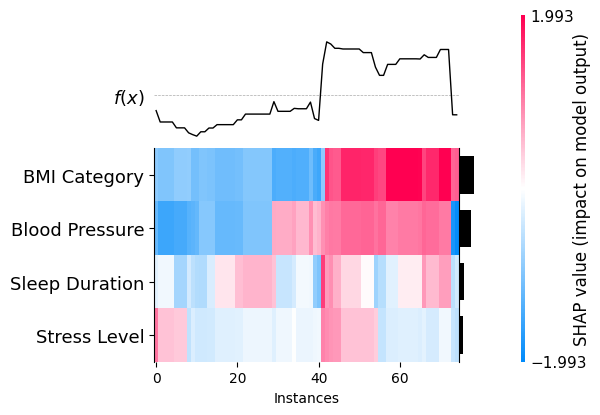

<Axes: xlabel='Instances'>

In [428]:
shap_explanation = shap.Explanation(values=shap_values,
                  base_values=xgb_explainer.expected_value,
                  data=X_test,
                  feature_names=x_feature_names)
shap.plots.heatmap(shap_explanation)

#### 篩選錯誤的數據

In [429]:
# 比較預測值與真實值
misclassified_indices = (y_pred_xgb != y_test)  # 錯誤分類的布林陣列
# 提取錯誤分類的數據
X_test_misclassified = X_testo[misclassified_indices]
y_test_misclassified = y_test[misclassified_indices]
y_pred_misclassified = y_pred_xgb[misclassified_indices]
x_feature_names = data.iloc[:,selected_features].columns
# 將錯誤分類數據整理成表格
misclassified_df = pd.DataFrame(X_test_misclassified, columns=x_feature_names)

In [430]:
data_org=pd.read_csv("/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv")

In [431]:
misclassified_data2 = data_org[data_org["Person ID"].isin(misclassified_df["Person ID"].values.tolist())]

misclassified_data2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
67,68,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,Insomnia
68,69,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,NaN
69,70,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,NaN
201,202,Male,43,Engineer,7.8,8,90,5,Normal,130/85,70,8000,Insomnia
359,360,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN


### confusion matrix

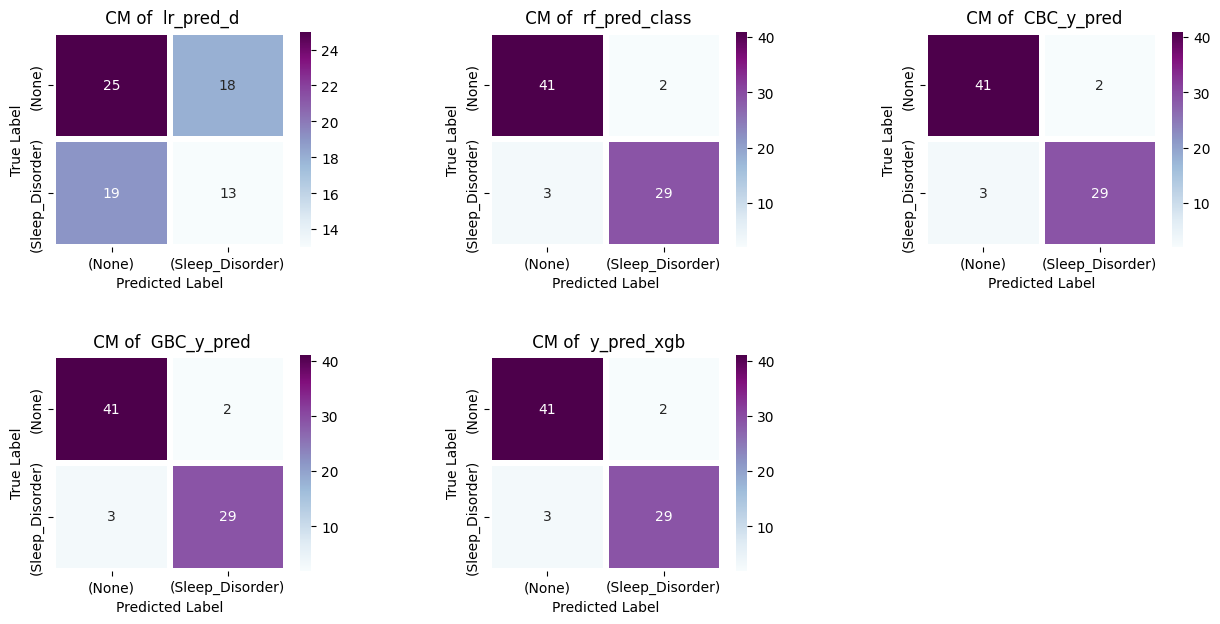

In [432]:
models_predictions=[lr_pred_d,rf_pred_class,CBC_y_pred,GBC_y_pred,y_pred_xgb]
model={1:'lr_pred_d',2:'rf_pred_class',3:'CBC_y_pred',4:'GBC_y_pred',5:'y_pred_xgb'}


plt.figure(figsize=(15,7))
for i,y_pred in enumerate(models_predictions,1) :

    cm = confusion_matrix(y_pred,y_test)

    plt.subplot(2,3,i)
    sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
                xticklabels=['(None)','(Sleep_Disorder)'],
                yticklabels=['(None)','(Sleep_Disorder)'])


    plt.title(' CM of  '+ model[i])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

### intepretation

In [433]:
lr_accuracy = accuracy_score(y_test, lr_pred_d)
rf_accuracy = accuracy_score(y_test, rf_pred_class)
cbc_accuracy = accuracy_score(y_test, CBC_y_pred)
gbc_accuracy = accuracy_score(y_test, GBC_y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

accuracy_scores = [lr_accuracy,rf_accuracy,cbc_accuracy,gbc_accuracy,xgb_accuracy]
print(accuracy_scores)

fig = px.bar(x=['Logistic Regression','Random Forest','Catboost','Gradient Boosting','XGB'], y=accuracy_scores)
fig.show()

[0.5066666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]
